## Home Prices Prediction
## Using Linear Regression for Machine Learning

In [12]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

## Loading the Data

In [13]:
housing_df = pd.read_csv(r'C:\Users\user\Documents\Summer Analytics\Final Assignment\train.csv')

In [17]:
# Make column labels lowercase
housing_df.columns = map(str.lower, housing_df.columns)
# Replace spaces in columns with underscore
housing_df.columns = housing_df.columns.str.replace('\s+', '_')

In [18]:
housing_df.head(5)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing_df.shape

(1460, 81)

## EDA
## 1. Data Types

In [19]:
housing_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [20]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [22]:
# Convert 'MSSubClass' column to type(str)
housing_df['mssubclass'] = housing_df['mssubclass'].astype(str)

## 2. Histograms of the Numeric columns

In [33]:
categorical_columns = housing_df.select_dtypes(['object']).columns
numeric_columns = housing_df.select_dtypes(exclude=['object']).columns
print(numeric_columns)

Index(['id', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice'],
      dtype='object')


In [24]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 37 numerical columns


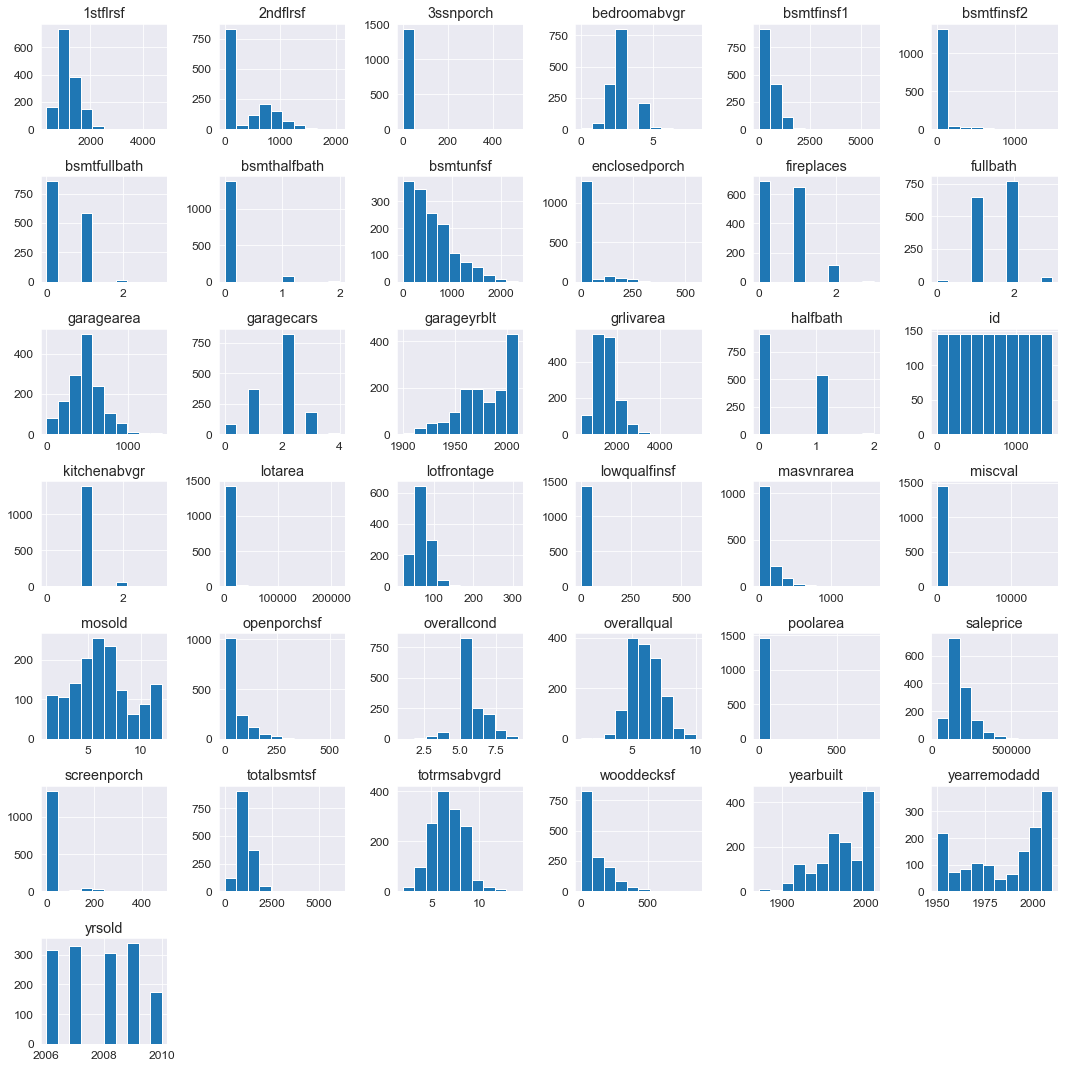

In [35]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
housing_df[numeric_columns].hist(ax=ax)
fig.tight_layout()
fig.show()

## 3. Scatter plots of Numeric columns against saleprice

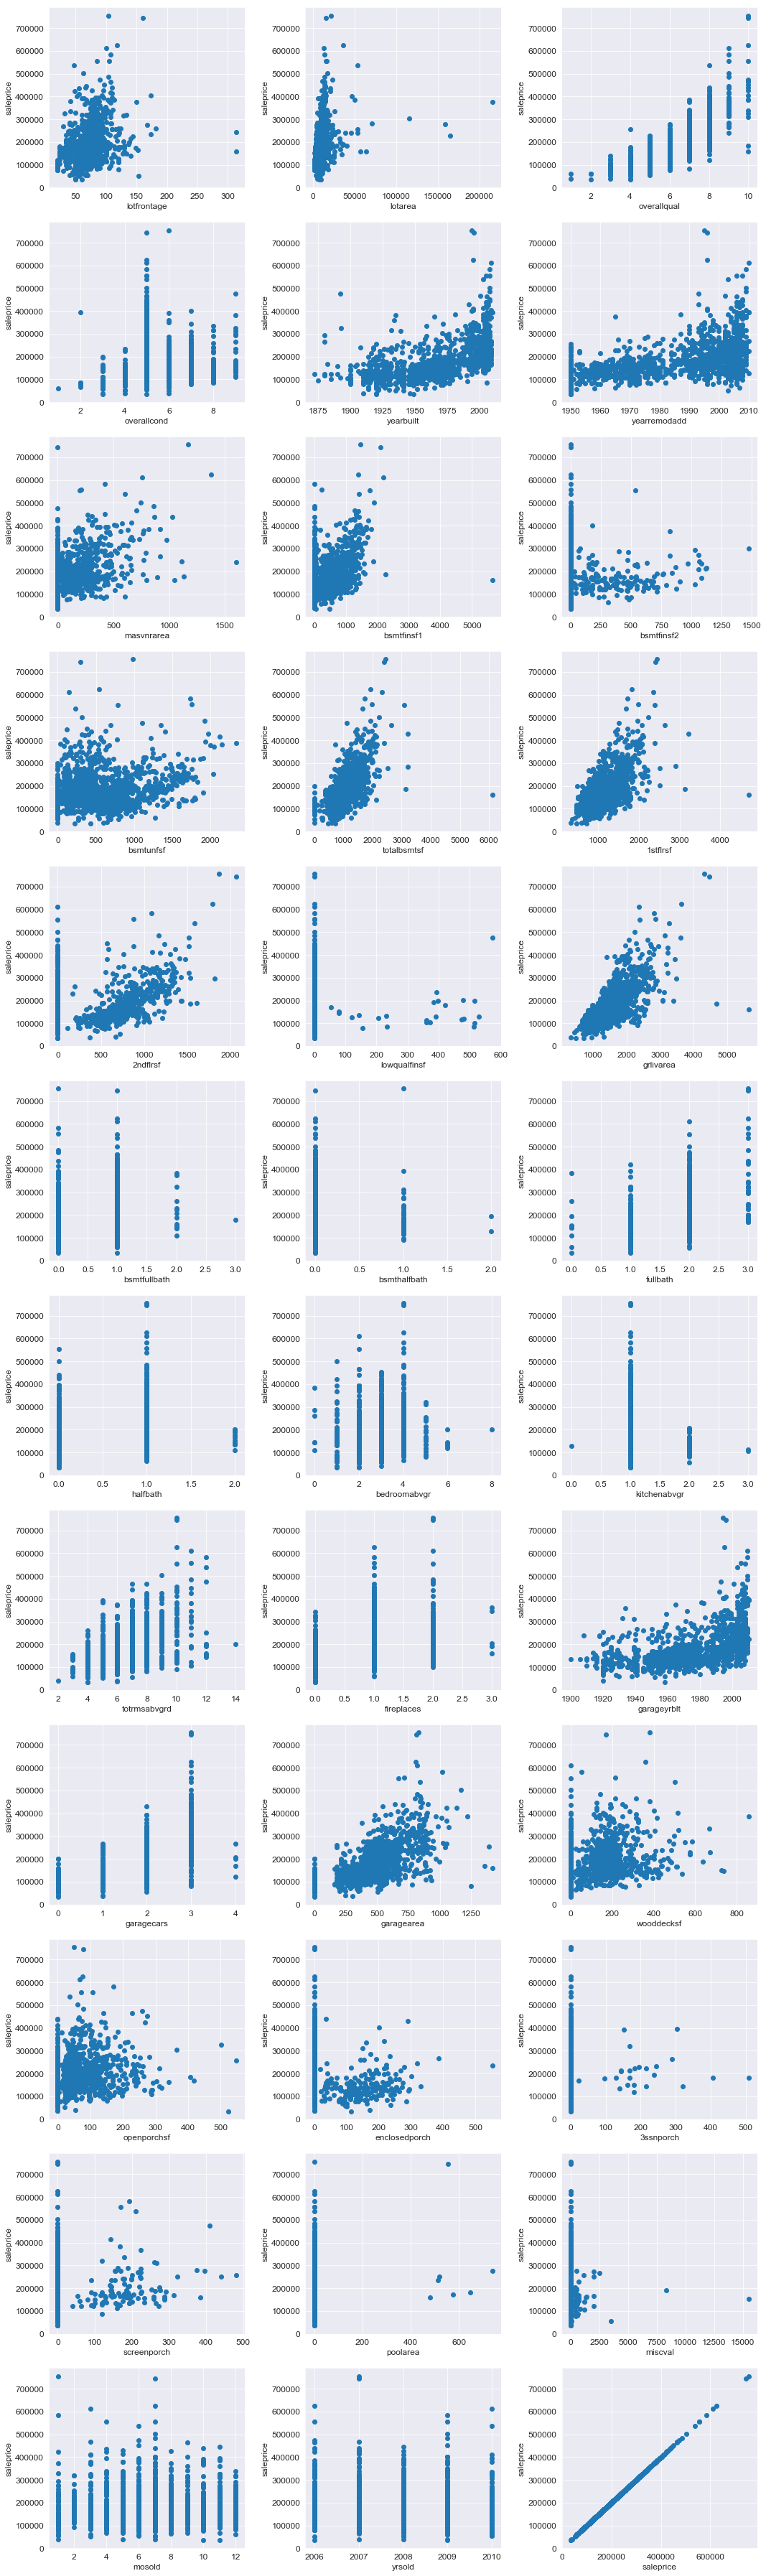

In [41]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_columns[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(housing_df[col], housing_df['saleprice'])
    plt.xlabel(col)
    plt.ylabel('saleprice')
fig.tight_layout()
fig.show()

Many features don't seem to have a strong relationship with price

## 4. Barplots to plot categorical variables against sale price

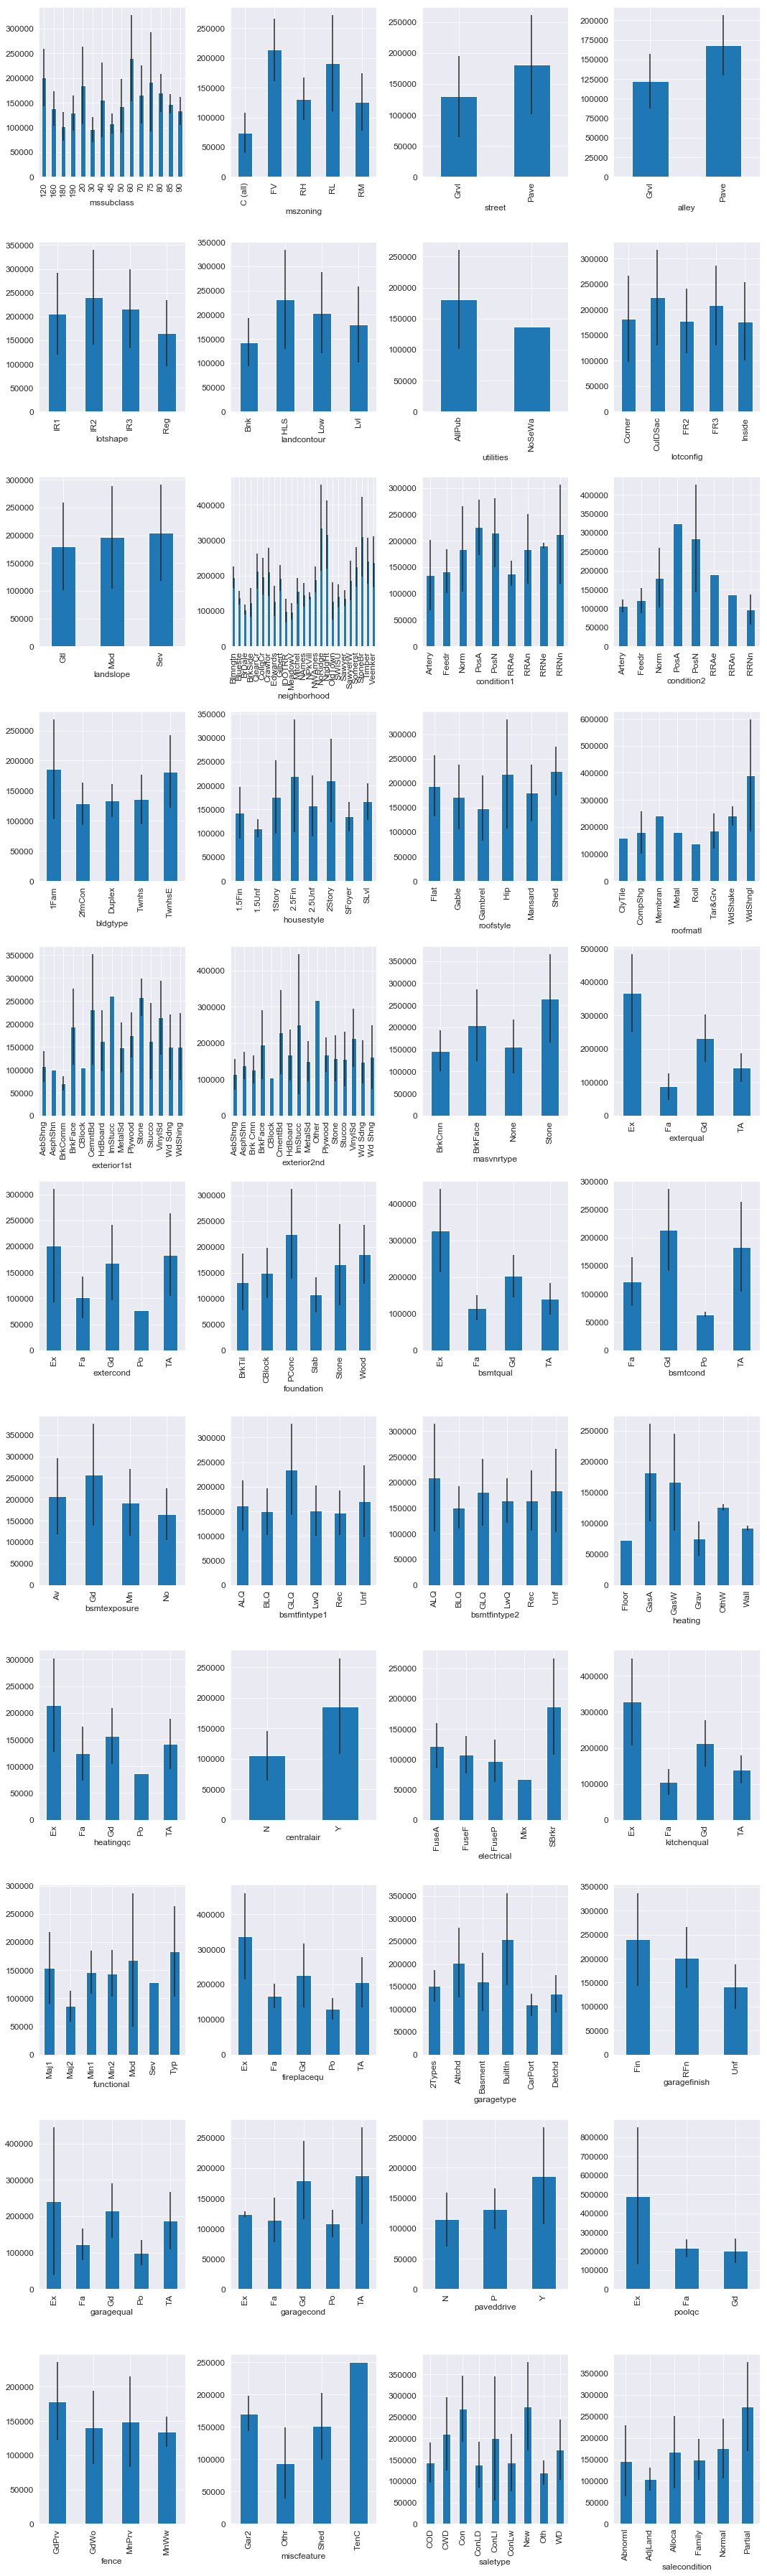

In [42]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_columns):
    fig.add_subplot(11,4,1+i)
    housing_df.groupby(col).mean()['saleprice'].plot.bar(yerr = housing_df.groupby(col).std())
fig.tight_layout()
fig.show()

## 5. Plotting the correlation

In [43]:
corr = housing_df.corr()
corr['saleprice'].sort_values(ascending= False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3ssnporch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: saleprice, dtype: float64

## 6. Preprocessing the Data - Removing the outliers from saleprice


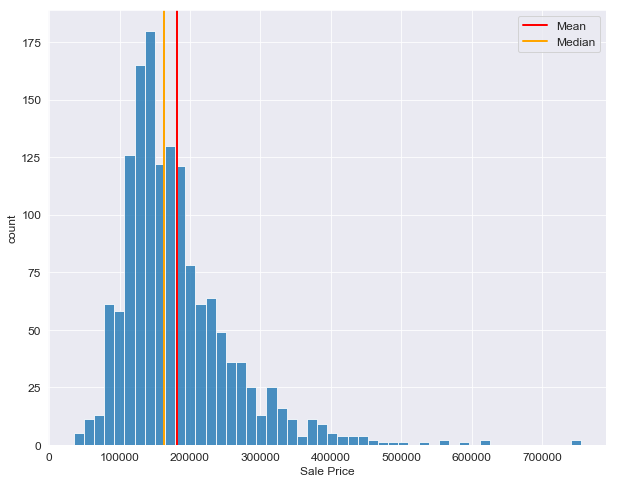

In [48]:
housing_df['saleprice'].hist(bins=50,alpha=0.8)
plt.axvline(housing_df['saleprice'].mean(),color= 'r',linewidth=2, label='Mean')
plt.axvline(housing_df['saleprice'].median(),color= 'orange',linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('count')
plt.legend()
plt.show()

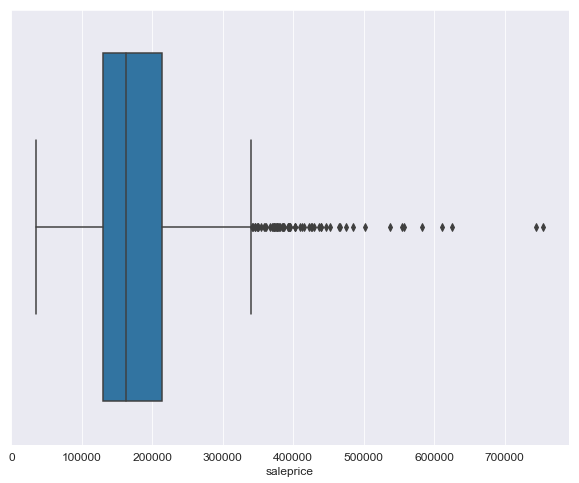

In [49]:
sns.boxplot(housing_df['saleprice'], orient='h')
plt.show()

In [50]:
housing_df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

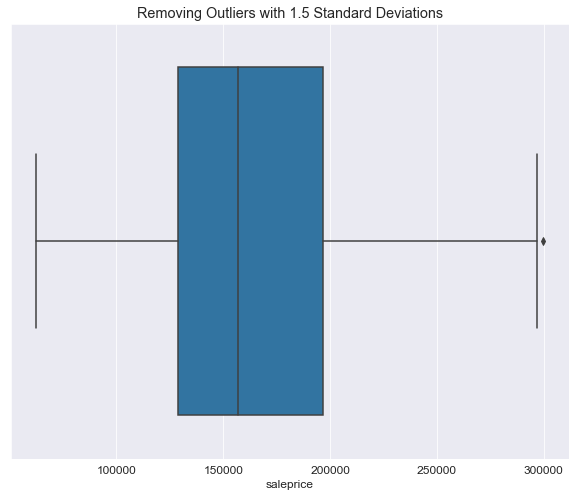

In [51]:
def reject_outliers(data, m=1.5):
    return data[abs(data-np.mean(data))< m* np.std(data)]
# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(housing_df['saleprice']),
            orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()
  

In [53]:
# Make series of mask
mask = reject_outliers(housing_df['saleprice']).tolist()
mask[0:20]

[208500,
 181500,
 223500,
 140000,
 250000,
 143000,
 200000,
 129900,
 118000,
 129500,
 144000,
 279500,
 157000,
 132000,
 149000,
 90000,
 159000,
 139000,
 139400,
 230000]

In [56]:
# Mask as Boolean
mask_results = housing_df['saleprice'].isin(mask)[0:20].tolist()
mask_results

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [57]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

{208500: True,
 181500: True,
 223500: True,
 140000: True,
 250000: True,
 143000: True,
 200000: False,
 129900: True,
 118000: True,
 129500: True,
 144000: True,
 279500: False,
 157000: True,
 132000: True,
 149000: True,
 90000: True,
 159000: True,
 139000: True,
 139400: True,
 230000: True}

In [58]:
# New dataframe based off mask
housing_df = housing_df[~housing_df['saleprice'].isin(mask) == False]
housing_df.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500


In [59]:
# Prince new 'saleprice' stat data
housing_df['saleprice'].describe()

count      1330.000000
mean     165529.114286
std       50948.464069
min       62383.000000
25%      128912.500000
50%      157000.000000
75%      196875.000000
max      299800.000000
Name: saleprice, dtype: float64

## Fill missing data

In [60]:
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

['lotfrontage',
 'alley',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature']

In [61]:
# Sum of nan values of each column
nulls = housing_df[nan_col_list].isnull().sum()
nulls

lotfrontage      249
alley           1242
masvnrtype         7
masvnrarea         7
bsmtqual          35
bsmtcond          35
bsmtexposure      36
bsmtfintype1      35
bsmtfintype2      36
electrical         1
fireplacequ      672
garagetype        72
garageyrblt       72
garagefinish      72
garagequal        72
garagecond        72
poolqc          1324
fence           1058
miscfeature     1278
dtype: int64

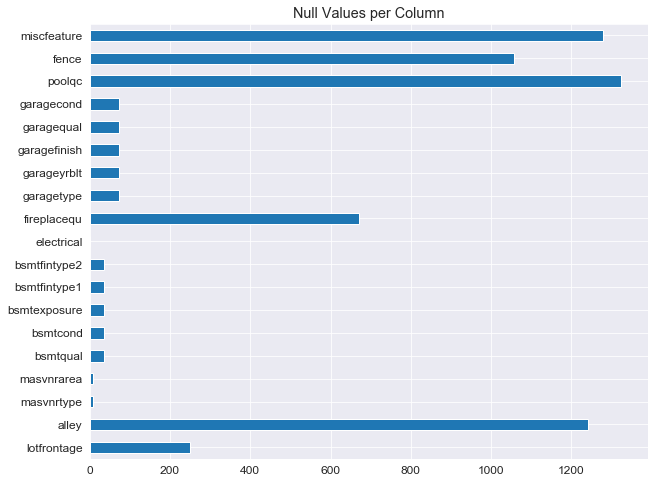

In [62]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [70]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['miscfeature',
          'fence',
          'poolqc',
          'garagecond',
          'garagequal',
          'garagefinish',
          'garagetype',
          'fireplacequ',
          'bsmtfintype1',
          'bsmtfintype2',
          'bsmtexposure',
          'alley']

In [71]:
housing_df[col_na] = housing_df[col_na].fillna('NA')
print(housing_df.shape)
housing_df.head()

(1330, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [72]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)

In [74]:
# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(housing_df,'garageyrblt')
garage_yr_blt_rand

array([2012, 1954, 2023, 1956, 1958, 1948, 1958, 1962, 1991, 2002, 1977,
       1988, 2021, 1984, 1968, 2030, 1975, 1959, 2000, 1973, 1957, 1976,
       1960, 1962, 1982, 1968, 1964, 1979, 1989, 2022, 1916, 1944, 1944,
       2012, 1979, 1908, 1974, 2018, 2007, 1927, 1939, 1963, 1956, 1966,
       1975, 1950, 2011, 1999, 1974, 1942, 1980, 1997, 1933, 1915, 2003,
       1971, 2007, 2029, 1973, 1967, 1965, 1971, 1996, 1993, 1964, 1994,
       1935, 1987, 1959, 1968, 1971, 1981])

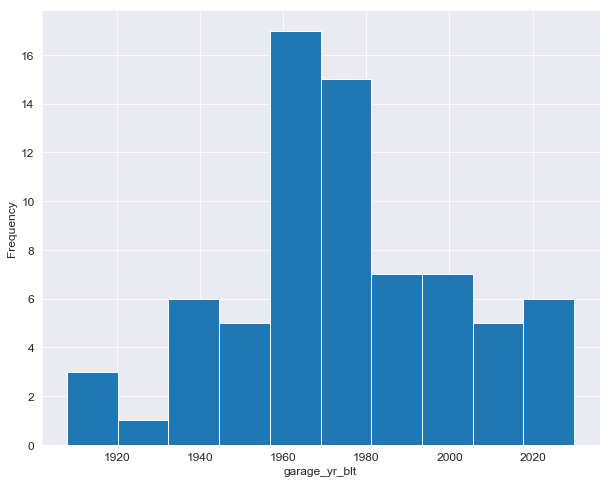

In [75]:
# Plot the random distribution of the 'garage_yr_blt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('garage_yr_blt')
plt.ylabel('Frequency')
plt.show()

In [76]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(housing_df,'lotfrontage')
lot_frontage_rand

array([ 85,  33,  91, 115,  95,  55,  51,  27, 104,  87,  79,  53, 104,
        60,  75,  92,  83,  42,  40,  52,  75, 104, 100, 107,  73,  69,
        92,  89, 120, 135,  94,  83,  80,  95, 119,  89,  79,  72, 105,
        95, 116,  41,  50,  80,  54,  63,  82,  57,  67,  49,  56,  60,
        47,  73,  32,  72,  64,  76,  62,  55,  85,  72,  74,  67,  68,
        59, 122,  58,  81,  56,  46, 102,  64, 100,  44,  58,  81,  81,
        57,  97,  64,  81,  35,  33,  63,  82,  66,  28,  73,  78,  63,
        75, 104,  41,  33,  67,  47,  86,  58,  80,  62,  51,  50,  68,
        62,  65,  83,  78,  30,  81,  55,  46, 100,  54,  63,  74,  32,
        90,  90,  59,  64,  50,  63,  56,  88,  55,  20,  77,  66,  44,
        57,  84,  58,  43,  83,  82,  36, 103, 107,  60, 108, 110,  73,
        35, 103,  35,  29, 119, 115,  27,  59,  44,  46,  45,  56,  45,
        69, 110,  73,  64,  67,  33,  62,  62,  59,  70,  69,  66,  49,
        94,  59,  89,  84,  62,  50,  31,  76,  62,  38,  94,  5

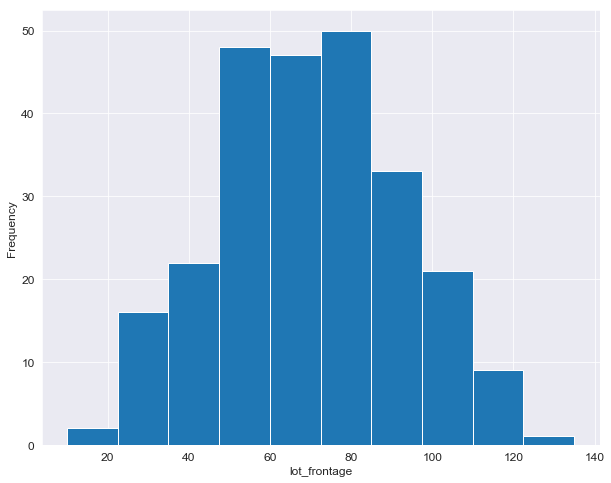

In [77]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('lot_frontage')
plt.ylabel('Frequency')
plt.show()

In [79]:
housing_df['lotfrontage'] = housing_df['lotfrontage'].fillna('9999')
housing_df['garageyrblt'] = housing_df['garageyrblt'].fillna('9999')
housing_df.loc[housing_df['lotfrontage']=='9999','lotfrontage'] = lot_frontage_rand
housing_df.loc[housing_df['garageyrblt']=='9999','garageyrblt'] = garage_yr_blt_rand

In [80]:
# Drop the rest
print('Before: ', housing_df.shape)
housing_df = housing_df.dropna()
print('After: ', housing_df.shape)

Before:  (1330, 81)
After:  (1287, 81)


In [81]:
# Verify that all null values are gone
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

[]

In [82]:
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nulls = housing_df[nan_col_list].isnull().sum()
nulls

Series([], dtype: float64)

## Creating Dummy variables for categorical variables

In [83]:
housing_df.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,85,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000
10,11,20,RL,70,11200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,129500


In [84]:
# Re-index housing_df so indices match 
housing_df.reset_index(inplace=True)
housing_df.head(20)

,index,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,8,60,RL,85,10382,Pave,NA,IR1,Lvl,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
7,8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
8,9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000
9,10,11,20,RL,70,11200,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,2,2008,WD,Normal,129500


In [86]:
dummies_df = pd.get_dummies(housing_df[categorical_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
dummies_df.head(20)

(1287, 271)


,mssubclass_120,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [87]:
housing_df = pd.concat([housing_df, dummies_df], axis=1)
print(housing_df.shape)
housing_df.head(20)

(1287, 353)


,index,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
1,1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
2,2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
3,3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,...,0,0,0,1,1,0,0,0,0,0
4,4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
5,5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
6,7,8,60,RL,85,10382,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
7,8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,...,0,0,0,1,1,0,0,0,0,0
8,9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
9,10,11,20,RL,70,11200,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0


In [100]:
housing_df.drop(categorical_columns,axis=1,inplace=True)
housing_df.head()

,index,id,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,1,65,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1,2,80,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,2,3,68,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,3,4,60,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,4,5,84,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


## Splitting the data into Train and Test set

In [101]:
from sklearn.model_selection import train_test_split 

In [102]:
X = housing_df.drop('saleprice',axis=1)

In [103]:
y = housing_df['saleprice']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [105]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(965, 308)
(322, 308)
(965,)
(322,)


## Scale the data

In [106]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()


In [107]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
scaler.mean_[1]

739.9751295336788

In [109]:
scaler.scale_[1]

424.10750104007207

# 4. Modeling
Now that I've completed EDA, I can now use the training data to build a model to predict home price from the features.
## A.Benchmarking
Linear Regression as the benchmark.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)# Make predictions using the testing set
y_pred = regr.predict(X_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [112]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.76439447e+07 -1.76439462e+07  3.55222157e+01  6.60250490e-01
  5.19446908e+03  4.12809672e+03  3.17919083e+02  1.46926958e+02
  6.58356554e+00  4.03052034e+11  4.03052034e+11  4.03052034e+11
 -4.03052034e+11 -3.22850393e+12 -3.22850393e+12 -3.22850393e+12
  3.22850393e+12  1.72051754e+03 -1.57822403e+03  1.00170512e+03
  1.06661435e+03  1.71430699e+03 -1.08888522e+04 -1.03512691e+03
  7.18361296e+02 -3.58338950e+01  2.89953719e+03  1.03788191e+01
  1.21795388e+01  1.60227286e+01  1.87448849e+01  3.71201406e+00
  2.98449729e+01  8.38275537e+05  3.96804126e+00  1.01536945e+02
 -1.15418518e+02  2.90405098e+09  2.90403923e+09  2.90405240e+09
  1.00983207e+09  2.90405919e+09  2.90405541e+09  2.90405100e+09
  2.90404435e+09  2.90406264e+09  2.90405878e+09  2.90406227e+09
  2.90406553e+09  2.90405116e+09  2.90405842e+09  1.61738772e+09
 -1.15354946e+09 -1.15350834e+09 -1.15352275e+09 -1.15351792e+09
 -1.15352683e+09 -1.26838814e+09 -1.26836732e+09  1.90176007e+09
  1.90176

## Results Dictionary

In [113]:
# Example dict
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

In [114]:
# Pass results into a DataFrame
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


## Raw Benchmark

In [115]:
results = list()

In [116]:
benchmark_raw = LinearRegression()

In [117]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [118]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07


## Scaled Benchmark

In [119]:
benchmark_raw.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_raw.score(X_train_scaled, y_train)
scaled_test_score = benchmark_raw.score(X_test_scaled, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_score})

In [120]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.372011e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21


## Naive Regularization

In [121]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [122]:
# Instantiate ridge pipeline
pipeline_regr = Pipeline([('scaler',StandardScaler()),
                          ('regr',Ridge())])

In [123]:
# Append ridge() results to list
pipeline_regr.fit(X_train,y_train)
regr_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regr_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regr_test_score})

In [124]:
# Append ridge() scaled results to list
pipeline_regr.fit(X_train_scaled, y_train)
regr_scaled_train_score = pipeline_regr.score(X_train_scaled, y_train)
regr_scaled_test_score = pipeline_regr.score(X_test_scaled, y_test)

results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regr_scaled_train_score})
results.append({'name':'ridge',
                'model':pipeline_regr,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regr_scaled_test_score})

In [125]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.372011e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-3.992693e+02
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-2.826024e+02
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.371962e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.565139e-01


In [126]:
# Instantiate ElasticNet pipeline
pipeline_regel = Pipeline([('scaler',StandardScaler()),
                           ('elastic_net',ElasticNet())])

In [127]:
# Append ElasticNet() results to list
pipeline_regel.fit(X_train,y_train)
regel_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regel_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regel_test_score})

In [128]:
# Append ElasticNet() scaled results to list
pipeline_regel.fit(X_train_scaled, y_train)
regel_scaled_train_score = pipeline_regel.score(X_train_scaled, y_train)
regel_scaled_test_score = pipeline_regel.score(X_test_scaled, y_test)

results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regel_scaled_train_score})
results.append({'name':'elasticnet',
                'model':pipeline_regel,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regel_scaled_test_score})

In [129]:
# Instantiate lasso pipeline
pipeline_regl = Pipeline([('scaler',StandardScaler()),
                          ('lasso',Lasso())])

In [130]:
# Append lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_score = pipeline_regl.score(X_train, y_train)
regl_test_score = pipeline_regl.score(X_test, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': regl_train_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': regl_test_score})

In [131]:
# Append scaled lasso() results to list
pipeline_regl.fit(X_train,y_train)
regl_train_scaled_score = pipeline_regl.score(X_train_scaled, y_train)
regl_test_scaled_score = pipeline_regl.score(X_test_scaled, y_test)

results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': regl_train_scaled_score})
results.append({'name':'lasso',
                'model':pipeline_regl,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': regl_test_scaled_score})

In [132]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.372011e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-3.992693e+02
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-2.826024e+02
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.371962e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.565139e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.657848e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-1.128083e+01


In [133]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.372011e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-3.992693e+02
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-2.826024e+02
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,9.371962e-01
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.565139e-01
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-2.657848e+01
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-1.128083e+01


In [134]:
# Display just the raw test results
results_df[(results_df['preprocessing'] == 'raw') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-2.826024e+02
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-1.128083e+01
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,8.573606e-01


In [135]:
# Display just the scaled test results
results_df[(results_df['preprocessing'] == 'scaled') & (results_df['dataset'] == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,8.565139e-01
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,8.475145e-01
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-2.639321e+02


In [136]:
# Display just the Benchmark models
results_df[(results_df['name'] == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.372045e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-2.699940e+07
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.372011e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-4.595730e+21


In [137]:
# Display just the Ridge model
results_df[(results_df['name'] == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-399.269307
5,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,raw,-282.602410
6,train,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.937196
7,test,"Pipeline(memory=None,\n steps=[('scaler', ...",ridge,scaled,0.856514


In [138]:
# Display just the Lasso models
results_df[(results_df['name'] == 'lasso')]

,dataset,model,name,preprocessing,score
12,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.937204
13,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,raw,0.857361
14,train,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-373.216080
15,test,"Pipeline(memory=None,\n steps=[('scaler', ...",lasso,scaled,-263.932124


In [139]:
# Display just the ElasticNet models
results_df[(results_df['name'] == 'elasticnet')]

,dataset,model,name,preprocessing,score
8,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-26.578480
9,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,raw,-11.280828
10,train,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.903060
11,test,"Pipeline(memory=None,\n steps=[('scaler', ...",elasticnet,scaled,0.847515


## Cross validate Models

In [140]:
cv_results = list()

In [141]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [142]:
alphas = np.logspace(-1,2,4)
alphas

array([  0.1,   1. ,  10. , 100. ])

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
# Find an optimal value for Ridge regression alpha using RidgeCV
optimal_ridge = RidgeCV(alphas=alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

10.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [145]:
# Cross-validate the Ridge regression R^2 with the optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.85941931 0.90299205 0.89986044 0.70699583 0.81248221 0.8824673
 0.8828247  0.8500746  0.36069534 0.81441753]
0.7972229301784826


In [146]:
# Find an optimal value for Lasso regression alpha using RidgeCV
optimal_lasso = LassoCV(alphas=alphas, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

100.0


In [147]:
# Cross-validate the Lasso regression R^2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.87880377 0.91249277 0.91996991 0.65739824 0.83248789 0.89810496
 0.89970018 0.88741198 0.2419912  0.8376192 ]
0.7965980092018841


In [148]:
# Find an optimal value for ElasticNet regression alpha using RidgeCV
optimal_elasticnet = ElasticNetCV(alphas=alphas, cv=10)
optimal_elasticnet.fit(X_train, y_train)

print(optimal_elasticnet.alpha_)

0.1


In [149]:
# Cross-validate the ElasticNet regression R^2 with the optimal alpha
elasticnet = ElasticNet(alpha=optimal_lasso.alpha_)

elasticnet_scores = cross_val_score(elasticnet, X, y, cv=10)

print(elasticnet_scores)
print(np.mean(elasticnet_scores))

[ 0.78622356  0.79611795  0.8448046   0.56940572  0.70394375  0.76613557
  0.82577902  0.70581765 -0.09948905  0.67603565]
0.6574774424437293


## Coefficients

In [150]:
# Get lasso coefficients
lasso.fit(X_train, y_train)

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
140,roofmatl_ClyTile,-205350.294326,205350.294326
117,condition2_PosN,-121966.554291,121966.554291
86,neighborhood_Crawfor,14897.965146,14897.965146
236,kitchenqual_Ex,14831.501542,14831.501542
96,neighborhood_NridgHt,14680.504127,14680.504127
102,neighborhood_StoneBr,12765.979464,12765.979464
95,neighborhood_NoRidge,12145.245758,12145.245758
38,mssubclass_160,-11766.459387,11766.459387
101,neighborhood_Somerst,11124.858713,11124.858713
203,bsmtexposure_Gd,10112.941819,10112.941819


In [151]:
# Get ridge coefficients
ridge.fit(X_train, y_train)

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
96,neighborhood_NridgHt,13840.271929,13840.271929
140,roofmatl_ClyTile,-13570.279349,13570.279349
117,condition2_PosN,-13556.017184,13556.017184
87,neighborhood_Edwards,-12553.737962,12553.737962
38,mssubclass_160,-11465.957148,11465.957148
236,kitchenqual_Ex,11365.568592,11365.568592
116,condition2_Norm,11303.841542,11303.841542
95,neighborhood_NoRidge,11055.498036,11055.498036
86,neighborhood_Crawfor,10991.423550,10991.423550
180,exterqual_Ex,-10331.621395,10331.621395


In [152]:
# Get elasticnet coefficients
elasticnet.fit(X_train, y_train)

elasticnet_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(elasticnet.coef_)})

elasticnet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elasticnet_coefs.head(20)

,variable,coef,abs_coef
6,yearbuilt,228.186378,536.751737
7,yearremodadd,98.097680,438.850175
4,overallqual,6096.476276,179.626720
33,poolarea,-42.369980,112.981436
32,screenporch,44.447588,97.728227
5,overallcond,4381.040884,97.224137
35,mosold,115.027310,73.966522
24,fireplaces,595.529158,73.357166
250,fireplacequ_NA,-7829.571053,68.023052
182,exterqual_Gd,8811.594716,59.324604


In [153]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

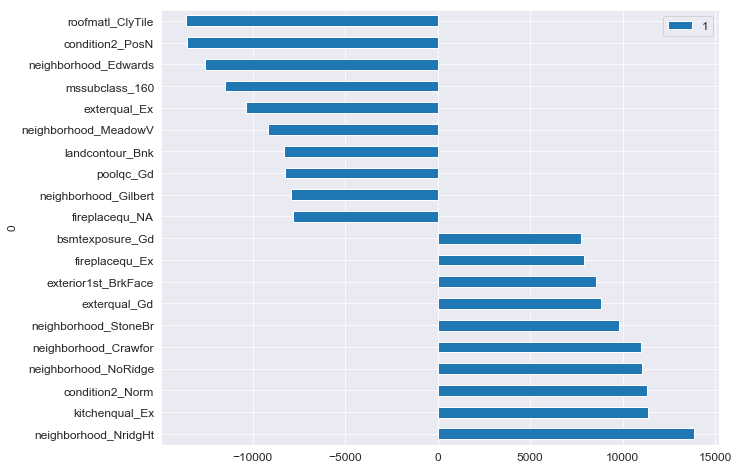

In [154]:
plot_coef(ridge)

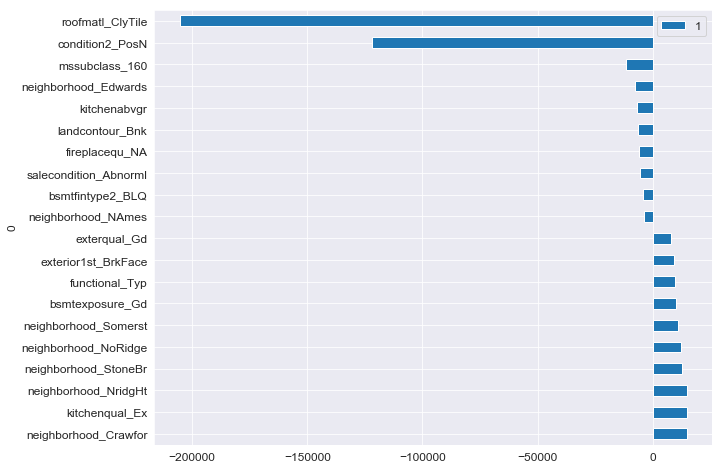

In [155]:
plot_coef(lasso)

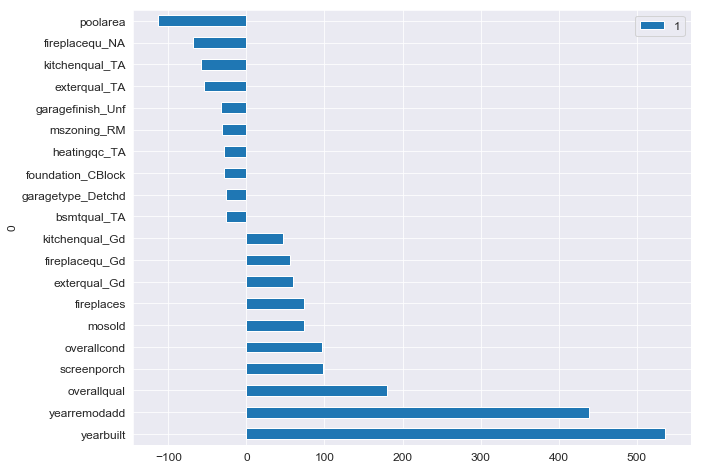

In [156]:
plot_coef(elasticnet)

My models show that the neighborhood a house is important. Thus, it would be best to invest in the neighborhoods